# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import numpy as np
import seaborn as sns


# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [4]:
employee=pd.read_csv("data/Employee.csv")
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [5]:
# Method 1
employee.groupby("Department").agg({"Salary":"mean"})

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [6]:
# Method 2
employee.pivot_table(index="Department",values="Salary",aggfunc="mean")

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [7]:
employee.pivot_table(index=["Department","Title"],values="Salary",aggfunc="mean")

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [8]:
employee.pivot_table(index=["Department","Title"],values=["Salary","Years"],aggfunc="mean")

Salary  Years
Department Title                   
HR         VP           70.0    8.0
           analyst      32.5    3.0
IT         VP           70.0    8.0
           analyst      32.5    1.5
           associate    60.0    7.0
Sales      associate    55.0    2.5

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [9]:
employee.pivot_table(index=["Department","Title"],aggfunc={"Salary":"mean","Name":"count"})


Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [10]:
employee.pivot_table(index=["Department","Title"],aggfunc={"Salary":["mean","max","min","std"]})

Salary                    
                        max  mean min       std
Department Title                               
HR         VP            70  70.0  70       NaN
           analyst       35  32.5  30  3.535534
IT         VP            70  70.0  70       NaN
           analyst       35  32.5  30  3.535534
           associate     60  60.0  60       NaN
Sales      associate     55  55.0  55  0.000000

For departments where there is only one person holding a specific title, there will be no standard deviation => fillna with 0.

#### Based on your comments, fill the missing values with an appropriate value.

In [11]:
employee.pivot_table(index=["Department","Title"],aggfunc={"Salary":["mean","max","min","std"]}).fillna(0)

Salary                    
                        max  mean min       std
Department Title                               
HR         VP            70  70.0  70  0.000000
           analyst       35  32.5  30  3.535534
IT         VP            70  70.0  70  0.000000
           analyst       35  32.5  30  3.535534
           associate     60  60.0  60  0.000000
Sales      associate     55  55.0  55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [12]:
employee.pivot_table(index=["Department"],aggfunc={"Salary":"sum","Name":"count"})

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [13]:
employee.pivot_table(index=["Department","Title"],aggfunc={"Salary":"mean","Years":"sum"})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [14]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [15]:
fitbit=pd.read_csv("data/Fitbit.csv")
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [16]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

In [17]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [18]:
spearmanr(fitbit["Minutes Very Active"],fitbit["Steps"])[0]

0.6321453084956241

In [19]:
pearsonr(fitbit["Minutes Very Active"],fitbit["Steps"])[0]

0.5714518481062607

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

<function matplotlib.pyplot.show(close=None, block=None)>

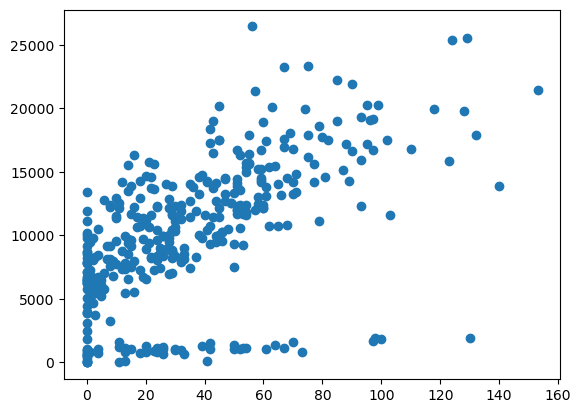

In [20]:
plt.scatter(x=fitbit["Minutes Very Active"],y=fitbit["Steps"])
plt.show

#### What can you say about Minute Very Active and Steps? Write a comment below

Relatively strong positive correlation but after passing a certain threshold of 5000 steps => then we see almost a linear relationship. The more you walk => the more Acitve minutes you will have logged. Monotonic curve


#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [21]:
spearmanr(fitbit["Minutes Sedentary"],fitbit["Steps"])[0]

-0.12199693227604608

In [22]:
pearsonr(fitbit["Steps"],fitbit["Minutes Sedentary"])[0]

0.0769060806299009

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

<function matplotlib.pyplot.show(close=None, block=None)>

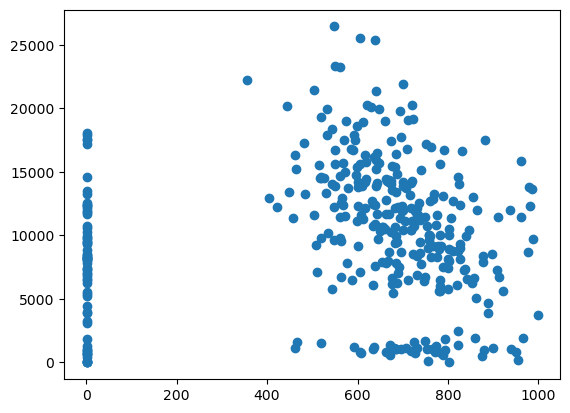

In [23]:
plt.scatter(x=fitbit["Minutes Sedentary"],y=fitbit["Steps"])
plt.show

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [24]:
spearmanr(fitbit["MinutesOfSleep"],fitbit["Steps"])[0]

0.09310892758263727

In [25]:
pearsonr(fitbit["MinutesOfSleep"],fitbit["Steps"])[0]

0.13098565950836386

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

<function matplotlib.pyplot.show(close=None, block=None)>

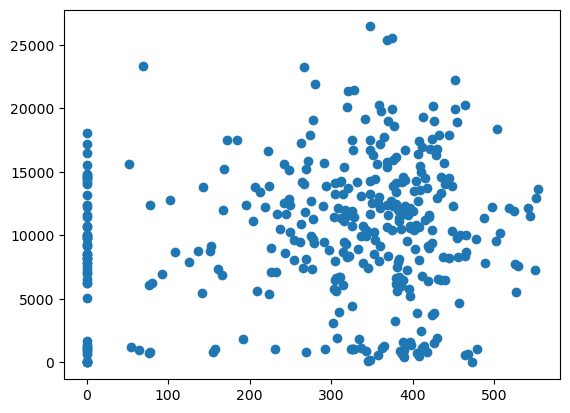

In [26]:
plt.scatter(x=fitbit["MinutesOfSleep"],y=fitbit["Steps"])
plt.show

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [27]:
cor_fit=fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']]
cor_fit.head()

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
0,1934,905,0,1.355,0,384
1,3631,18925,4,611.000,60,454
2,3204,14228,1,602.000,77,387
3,2673,6756,8,749.000,4,311
4,2495,502,1,876.000,0,407


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [28]:
cor_fit=cor_fit.corr(method="pearson")
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


In [29]:
cor_fit["Steps"].sort_values()

Minutes Sedentary      0.076906
MinutesOfSleep         0.130986
Calorie burned         0.255305
Floors                 0.306511
Minutes Very Active    0.571452
Steps                  1.000000
Name: Steps, dtype: float64

<Axes: >

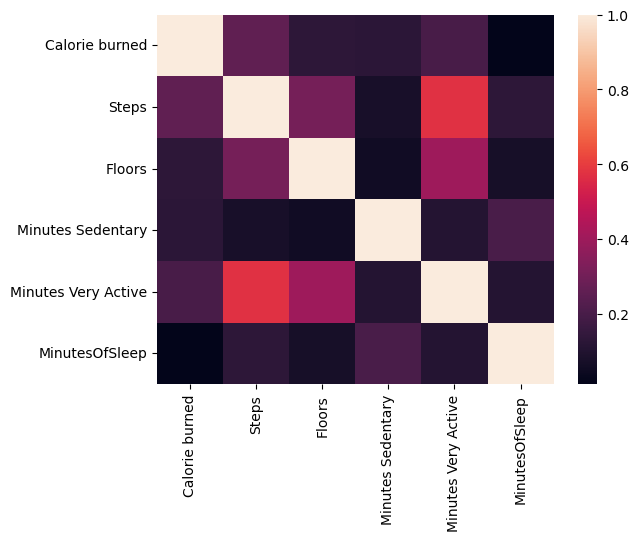

In [30]:
sns.heatmap(cor_fit)

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [31]:
time_grades=pd.read_csv("data/Time_Grades.csv")
time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the time_grades dataset.

array([[<Axes: title={'center': 'Grade'}>,
        <Axes: title={'center': 'Study time'}>]], dtype=object)

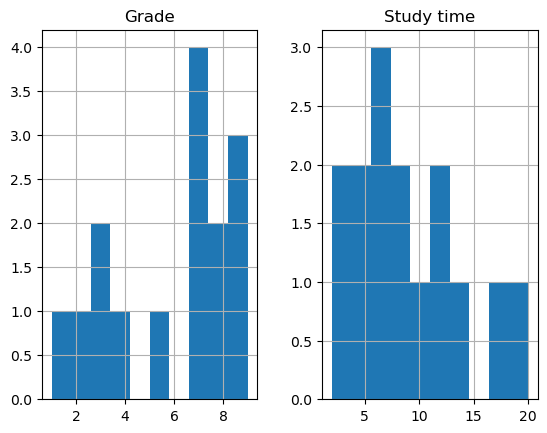

In [32]:
time_grades.hist(column=["Grade","Study time"])

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [33]:
pearsonr(time_grades["Study time"],time_grades["Grade"])[0]

0.7980456073578857

In [34]:
spearmanr(time_grades["Study time"],time_grades["Grade"])[0]

0.819658753036942

There is a strong positive correlation between study time and grade

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

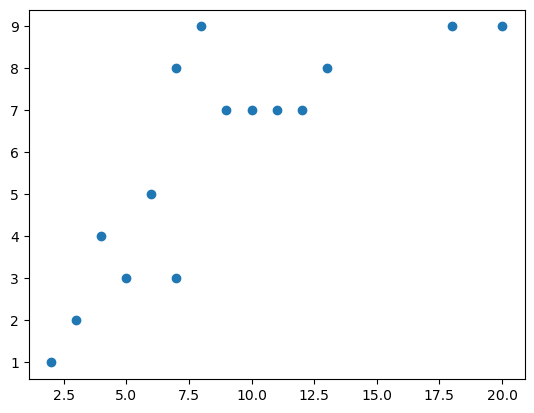

In [35]:
plt.scatter(x=time_grades["Study time"],y=time_grades["Grade"])
plt.show()

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

Though both extremely strong, Spearman correlation is higher than Pearson. As you can see from the graph, this relationship has a bit of a monotonic curve rather than being strictly linear. Spearman is also more efficient when it comes to dealing with outliers (20h study time)